<a href="https://colab.research.google.com/github/VisheshManav/mlzoomcamp-cohort-2022/blob/main/homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Link to MLZoomcamp](https://github.com/alexeygrigorev/mlbookcamp-code/tree/master/course-zoomcamp)\
[Link to Dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"

In [3]:
df = pd.read_csv(data)
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


__Data Prepration__

In [4]:
df.fillna(0, inplace=True)

In [5]:
df['rooms_per_household'] = df.total_rooms / df.households
df['bedrooms_per_room'] = df.total_bedrooms / df.total_rooms
df['population_per_household'] = df.population / df.households

__Q1__\
9136

In [6]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

__Q2__\
total_bedrooms and households


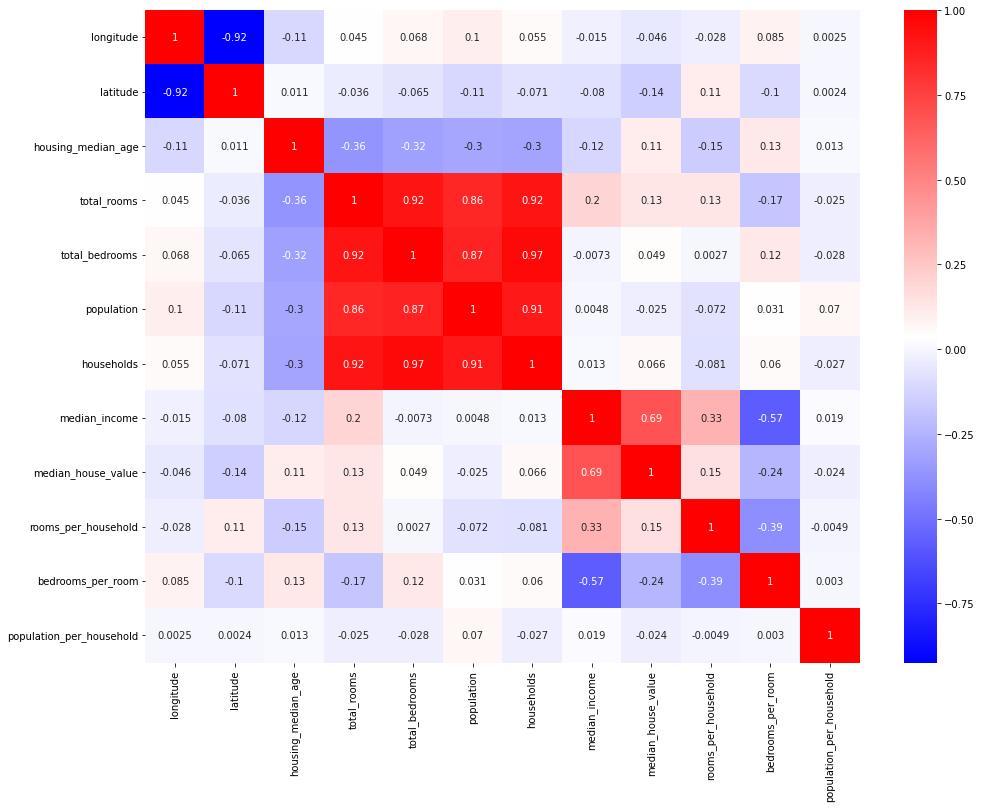

In [7]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), cmap='bwr', annot=True)

In [8]:
corr_matrix = df.corr()
(corr_matrix['total_bedrooms']['households'],
 corr_matrix['total_bedrooms']['total_rooms'],
 corr_matrix['population']['households'],
 corr_matrix['population_per_household']['total_rooms'])

(0.966507240042043,
 0.9201961721166215,
 0.9072222660959659,
 -0.02458065899398796)

__Make median_house_value binary__

In [9]:
mean = df.median_house_value.mean()
df['above_average'] = (df.median_house_value >= mean).astype('int')
del df['median_house_value']

__Split the data__

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

__Q3__\
0.10

In [12]:
from sklearn.metrics import mutual_info_score

In [13]:
score = mutual_info_score(y_train, df_train.ocean_proximity)
round(score, 2)

0.1

__Q4__\
0.84

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score

In [15]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [16]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [17]:
y_pred = model.predict_proba(X_val)[:, 1]
orig_accuracy = accuracy_score(y_val, y_pred >= 0.5)
round(orig_accuracy, 2)

0.83

__Q5__\
total_rooms and total_bedrooms have same difference

In [18]:
k_drop_accuracy = []

for d in df_train.columns:
  df_train_k = df_train.drop(d, 1)
  df_val_k = df_val.drop(d, 1)

  train_dict = df_train_k.to_dict(orient='records')
  val_dict = df_val_k.to_dict(orient='records')

  dv = DictVectorizer(sparse=False)
  dv.fit(train_dict)

  X_train = dv.transform(train_dict)
  X_val = dv.transform(val_dict)

  model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_val)
  k_drop_accuracy.append(accuracy_score(y_val, y_pred))


In [19]:
diff = np.abs(orig_accuracy - np.asarray(k_drop_accuracy))
list(zip(df_train.columns, diff))

[('longitude', 0.0036330608537692433),
 ('latitude', 0.0024220405691794955),
 ('housing_median_age', 0.005146836209506511),
 ('total_rooms', 0.0003027550711474092),
 ('total_bedrooms', 0.0003027550711474092),
 ('population', 0.009990917347865613),
 ('households', 0.004541326067211582),
 ('median_income', 0.049349076597033026),
 ('ocean_proximity', 0.013018468059339927),
 ('rooms_per_household', 0.0009082652134423386),
 ('bedrooms_per_room', 0.0009082652134423386),
 ('population_per_household', 0.0)]

__Q6__\
0

In [20]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [21]:
df_copy = pd.read_csv(data)
df_copy.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [22]:
df_copy['median_house_value'] = np.log1p(df_copy['median_house_value'])

df_full_train, df_test = train_test_split(df_copy, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
                                    
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']


In [23]:
train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)
X_val = dv.transform(val_dict)

In [24]:
print('Alpha -> RMSE')
for a in [0, 0.01, 0.1, 1, 10]:
  model = Ridge(alpha=a, solver='sag', random_state=42)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_val)

  score = np.sqrt(mean_squared_error(y_val, y_pred))
  print(a, ' -> ', round(score, 3))

Alpha -> RMSE
0  ->  0.525
0.01  ->  0.525
0.1  ->  0.525
1  ->  0.525
10  ->  0.525
